In [1]:
import sys

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append(".")

In [3]:
from src.nn import NeuralNetwork, Layer
from src.activation import Sigmoid, Tanh, ReLU
from src.losses import MSE, BinaryCrossEntropy
from src.metrics import Accuracy, R2

In [4]:
np.random.seed(42)
random.seed(42)

### Classification task with Tanh activation {-1, 1}

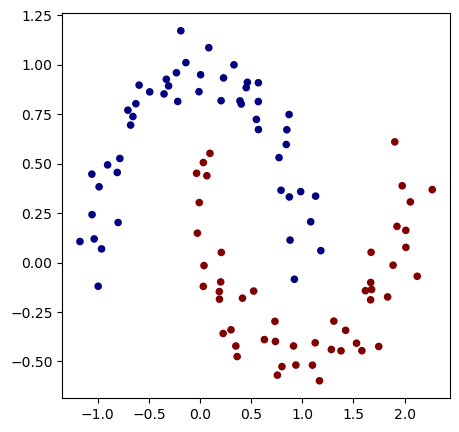

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [6]:
network = NeuralNetwork(
    [
        Layer(2, 100, Tanh()),  
        Layer(100, 1, Tanh()),
    ],
    loss_f=MSE(),
    metrics=Accuracy(),
    learning_rate=0.1,
)

In [7]:
network.fit(X, y, n_epochs=100, batch_size=16)

Epoch 0/100, Mean Squared Error loss: 0.549841616834913, Accuracy score on training data: 0.8392857142857143.
Epoch 10/100, Mean Squared Error loss: 0.33252272648470743, Accuracy score on training data: 0.8839285714285714.
Epoch 20/100, Mean Squared Error loss: 0.2576308644243649, Accuracy score on training data: 0.9464285714285714.
Epoch 30/100, Mean Squared Error loss: 0.2555852692042078, Accuracy score on training data: 0.9196428571428571.
Epoch 40/100, Mean Squared Error loss: 0.22334352707756416, Accuracy score on training data: 0.9285714285714286.
Epoch 50/100, Mean Squared Error loss: 0.17663235746191017, Accuracy score on training data: 0.9464285714285714.
Epoch 60/100, Mean Squared Error loss: 0.04444802402784782, Accuracy score on training data: 0.9910714285714286.
Epoch 70/100, Mean Squared Error loss: 0.013169631411853646, Accuracy score on training data: 1.0.
Epoch 80/100, Mean Squared Error loss: 0.008199724206601136, Accuracy score on training data: 1.0.
Epoch 90/100, Me

In [8]:
probs = network.predict(X, predict_proba=True)
network.score(probs, y)

1.0

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(network, X, y):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict on grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = network.predict(grid_points, predict_proba=True)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=50, cmap="RdBu", alpha=0.8)
    plt.colorbar(label="Prediction probability")
    
    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), 
                edgecolors='k', s=40, label="True labels")
    
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

def plot_predictions_vs_actual(y_true, y_pred_proba):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_true)), y_true, c='blue', label="True labels", alpha=0.7)
    plt.scatter(range(len(y_pred_proba)), y_pred_proba, c='red', 
                label="Predicted probabilities", alpha=0.5)
    plt.axhline(0.5, color='black', linestyle='--', label="Decision threshold")
    plt.title("Predictions vs True Labels")
    plt.xlabel("Sample index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

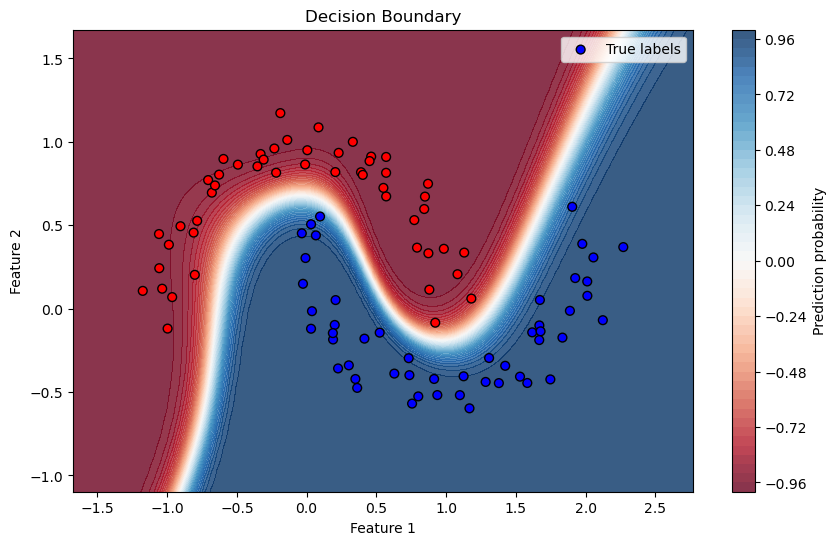

In [10]:
plot_decision_boundary(network, X, y)

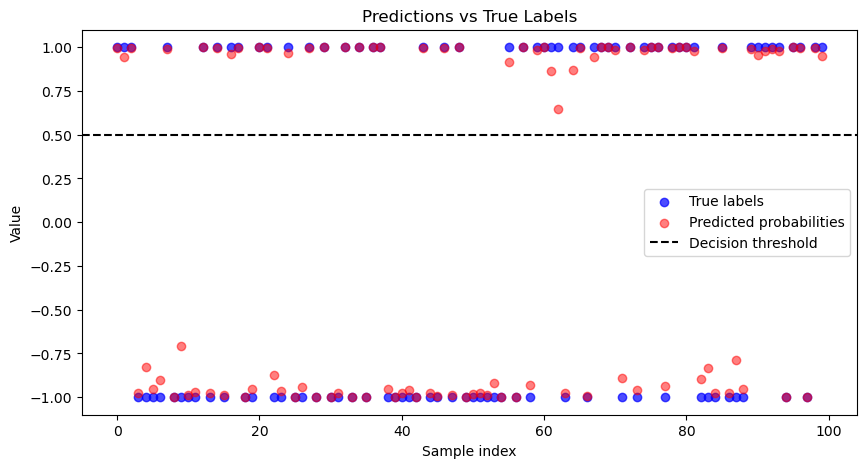

In [11]:
plot_predictions_vs_actual(y, probs)

### Another Classification task - with Sigmoid activation

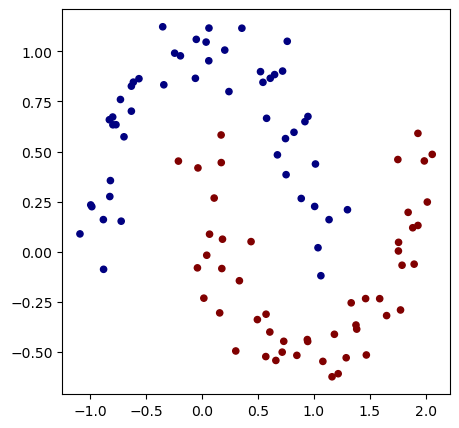

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [105]:
network = NeuralNetwork(
    [
        Layer(2, 64, ReLU()), 
        Layer(64, 1, Sigmoid()),
    ],
    loss_f=BinaryCrossEntropy(),
    metrics=Accuracy(),
    learning_rate=0.1,
)

In [110]:
network.fit(X, y, n_epochs=100, batch_size=64)

Epoch 0/100, Binary Cross-Entropy loss: 0.2630990743637085, Accuracy score on training data: 0.9036458333333333.
Epoch 10/100, Binary Cross-Entropy loss: 0.26305826753377914, Accuracy score on training data: 0.9036458333333333.
Epoch 20/100, Binary Cross-Entropy loss: 0.2626749947667122, Accuracy score on training data: 0.9036458333333333.
Epoch 30/100, Binary Cross-Entropy loss: 0.2627141773700714, Accuracy score on training data: 0.9036458333333333.
Epoch 40/100, Binary Cross-Entropy loss: 0.2623264938592911, Accuracy score on training data: 0.9036458333333333.
Epoch 50/100, Binary Cross-Entropy loss: 0.2622535526752472, Accuracy score on training data: 0.9036458333333333.
Epoch 60/100, Binary Cross-Entropy loss: 0.2618272230029106, Accuracy score on training data: 0.9036458333333333.
Epoch 70/100, Binary Cross-Entropy loss: 0.26178889721632004, Accuracy score on training data: 0.9036458333333333.
Epoch 80/100, Binary Cross-Entropy loss: 0.2614329680800438, Accuracy score on training

In [111]:
probs = network.predict(X, predict_proba=True)
network.score(probs, y)

0.9

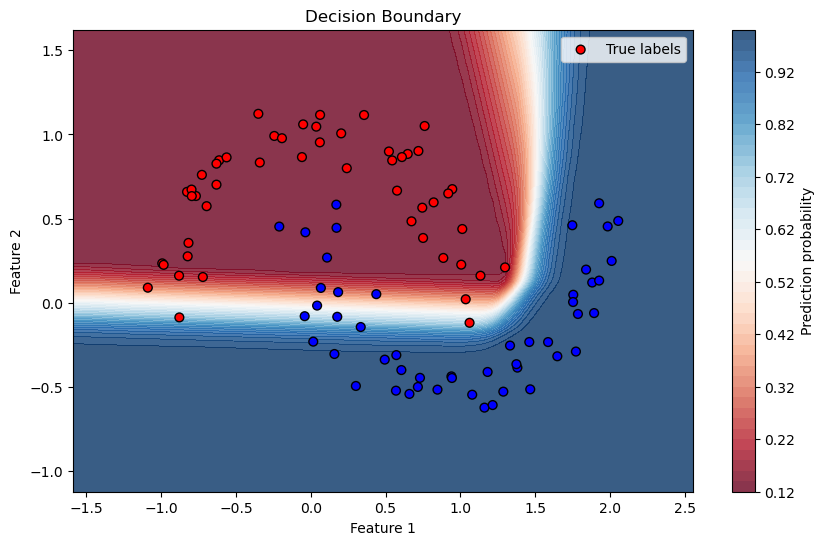

In [112]:
plot_decision_boundary(network, X, y)

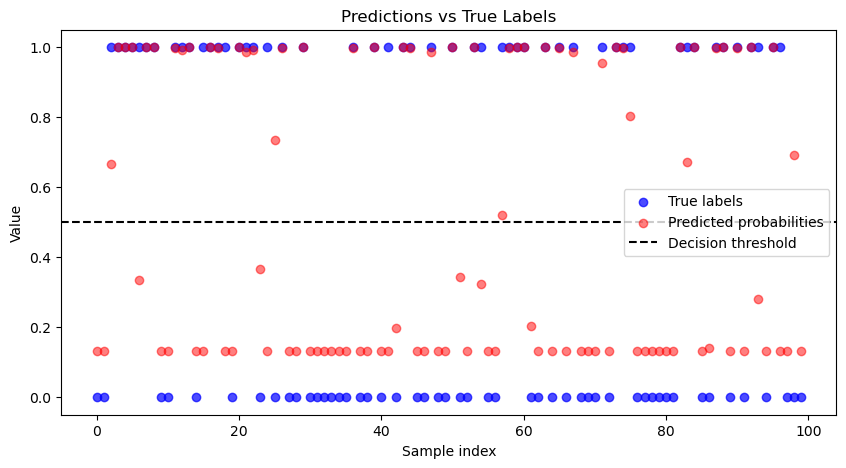

In [113]:
plot_predictions_vs_actual(y, probs)

### Regression task

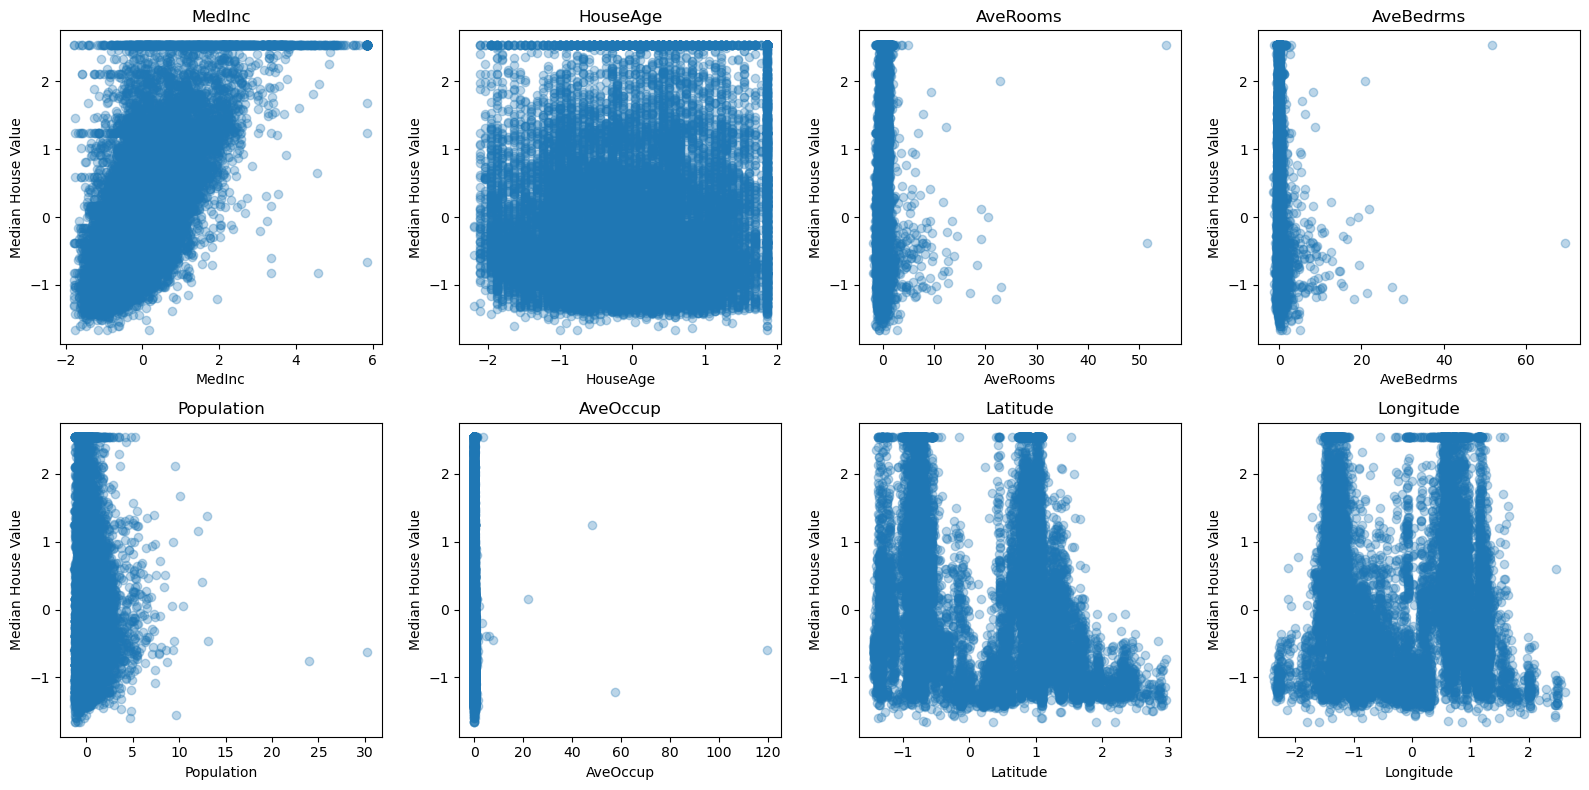

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
feature_names = fetch_california_housing().feature_names
y = y.reshape(-1, 1)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(X_scaled.shape[1]):
    axes[i].scatter(X_scaled[:, i], y_scaled, alpha=0.3)
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel("Median House Value")

plt.tight_layout()
plt.show()

In [26]:
network = NeuralNetwork(
    [
        Layer(X_scaled.shape[1], 16, ReLU()), 
        Layer(16, 1),
    ],
    loss_f=MSE(),
    metrics=R2(),
    learning_rate=0.001,
)

In [ ]:
network.fit(X_scaled, y_scaled, n_epochs=100, batch_size=64)

Epoch 0/100, MSE loss: 1.1243632185523724, R2 score on training data: -0.6186367998728786.


In [25]:
y_pred_scaled = network.predict(X_scaled)
network.score(y_pred_scaled, y_scaled)

-1.0

In [19]:
y_true = scaler_y.inverse_transform(y_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

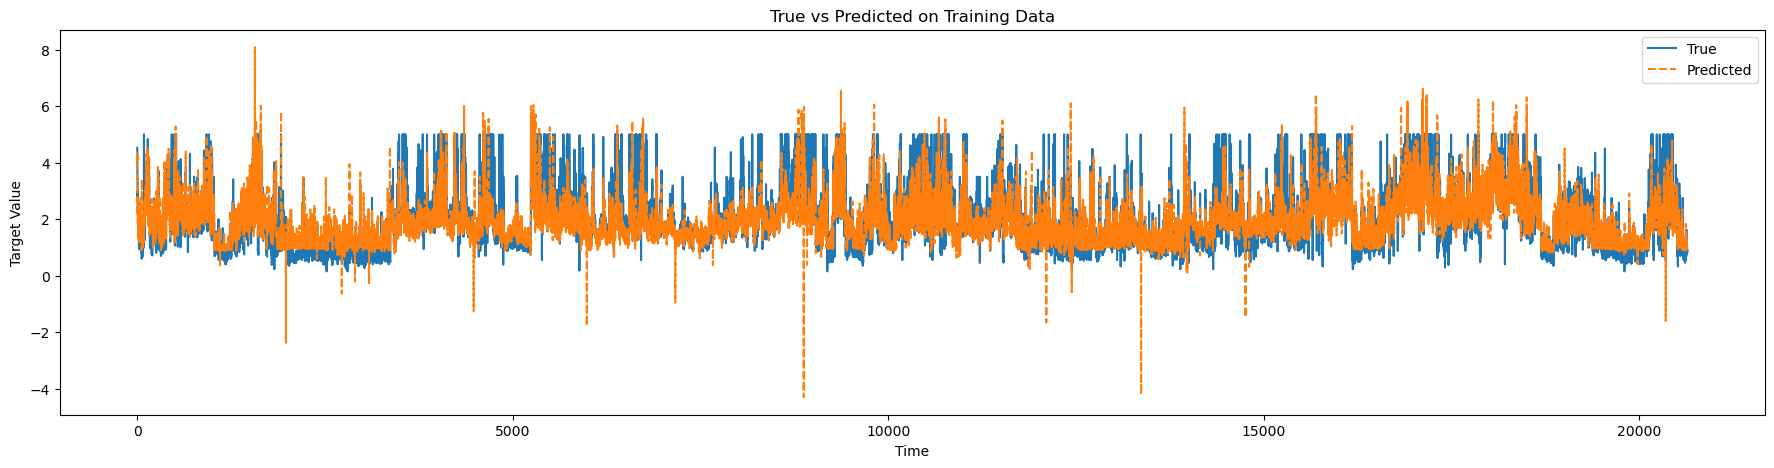

In [20]:
plt.figure(figsize=(22, 5))
plt.plot(y_true, label="True")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.legend()
plt.title("True vs Predicted on Training Data")
plt.xlabel("Time")
plt.ylabel("Target Value")
plt.show()